## Part 1 ##

# Training a Sequential CNN to classify Handwritten digits#

In the following cells,a sequential convolutional neural netwwork is trained to classify handwritten digits with a significant accuracy. This will be needed to extract digits from the images to and produce input to feed into the neural network.

The keras utitilies are used to build the CNN

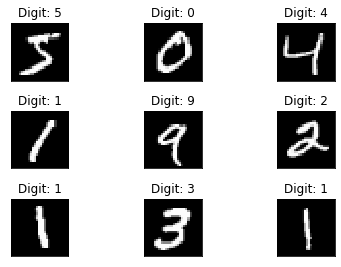

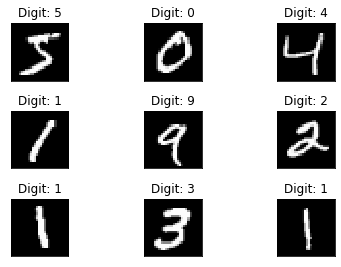

In [42]:
#Loading in the important libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras


#Working with the CPU as my personal system does not contain a GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

#Importing keras functions and MNIST dataset for handwritten digit classification
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Looking at the Data

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [44]:
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [45]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [47]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [50]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

Epoch 1/20
469/469 - 11s - loss: 0.0428 - acc: 0.9865 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 2/20
469/469 - 7s - loss: 0.0391 - acc: 0.9879 - val_loss: 0.0669 - val_acc: 0.9790
Epoch 3/20
469/469 - 7s - loss: 0.0381 - acc: 0.9876 - val_loss: 0.0694 - val_acc: 0.9799
Epoch 4/20
469/469 - 7s - loss: 0.0354 - acc: 0.9888 - val_loss: 0.0695 - val_acc: 0.9802
Epoch 5/20
469/469 - 7s - loss: 0.0340 - acc: 0.9886 - val_loss: 0.0663 - val_acc: 0.9796
Epoch 6/20
469/469 - 7s - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0738 - val_acc: 0.9779
Epoch 7/20
469/469 - 7s - loss: 0.0293 - acc: 0.9904 - val_loss: 0.0663 - val_acc: 0.9804
Epoch 8/20
469/469 - 7s - loss: 0.0286 - acc: 0.9906 - val_loss: 0.0620 - val_acc: 0.9822
Epoch 9/20
469/469 - 7s - loss: 0.0268 - acc: 0.9912 - val_loss: 0.0679 - val_acc: 0.9803
Epoch 10/20
469/469 - 7s - loss: 0.0260 - acc: 0.9916 - val_loss: 0.0716 - val_acc: 0.9789
Epoch 11/20
469/469 - 7s - loss: 0.0243 - acc: 0.9919 - val_loss: 0.0628 - val_acc: 0.9821
Epoch 1

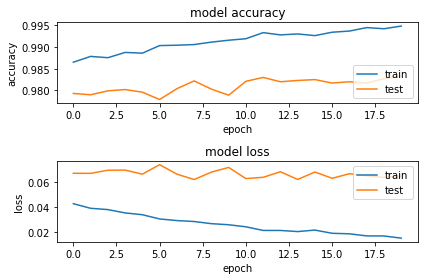

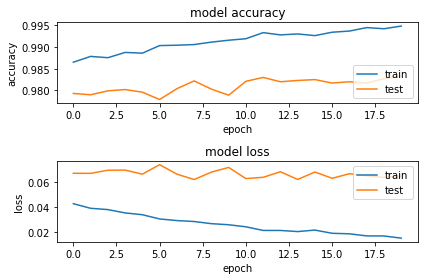

In [51]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Conclusion of Part 1 ##

In this part, a CNN for identifying hand written digits was trained.

Accuracy Achieved ~ 98%

Which is sufficient to train a fairly well performing sudoku solver




_______________________________________________________________________________________________________________________________



## Part 2 ##
# Using OpenCV for Image Processing #

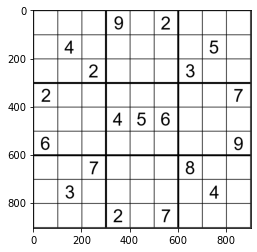

In [70]:
puzzle = cv2.imread('sudoku.png')
gray_puzzle= cv2.cvtColor(puzzle, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_puzzle,cmap='gray')

In [71]:
destination = cv2.GaussianBlur(gray_puzzle,(1,1),cv2.BORDER_DEFAULT)
adaptiveThreshold(sudoku, gray_puzzle, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 5, 2);
plt.imshow(threshold_val,cmap='gray')

SyntaxError: invalid syntax (<ipython-input-71-ab092a1d0662>, line 1)

In [66]:
grid = cv2.HoughLinesP(threshold_val,1,np.pi/180,100,set_min=100,set_max=10)
for lines in grid:
    hor_1,ver_1,hor_2,ver_2 = lines[0]
    cv2.line(image,(hor_1,ver_1),(hor_2,ver_2),(0,255,0),2, cv2.LINE_AA)
cv2.imwrite('tranform.jpg' , image)
hough_image = cv2.imread('transform.jpg',0)
final = cv2.imread('transform.jpg')
plt.imshow(final, cmap='gray')

TypeError: 'set_min' is an invalid keyword argument for HoughLinesP()

In [63]:

def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    rect[0] = pts[0]
    rect[2] = pts[2]
    
    diff = np.diff(pts, axis = 1)
    rect[3] = pts[3]
    rect[1] = pts[1]
    
    return rect


def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([[0, 0], [0, maxHeight - 1],[maxWidth - 1, maxHeight - 1], [maxWidth - 1, 0]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped